HW3 - standard-identification-deeplearning


SubHW3-2

A) Hierarchical Clustering with Ward Linkage

In this part, we apply Agglomerative Hierarchical Clustering on the same wheat seed dataset used previously.

The dataset is first loaded into a Pandas DataFrame and converted into a NumPy array, excluding the class labels.

We use AgglomerativeClustering from scikit-learn with:

n_clusters = 3

linkage = 'ward' (which minimizes within-cluster variance)

metric = 'euclidean' for computing spatial dissimilarity between samples.

The clustering process recursively merges the most similar pairs of clusters based on the chosen distance and linkage criteria until the desired number of clusters is formed.

The resulting cluster labels can be used for further evaluation or visualization.




In [4]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Load the dataset
df = pd.read_csv("seeds_dataset.txt", sep="\s+", header=None, engine="python")
df.columns = ['Area', 'Perimeter', 'Compactness', 'Kernel_Length', 'Kernel_Width',
              'Asymmetry_Coeff', 'Kernel_Groove_Length', 'Class']

# Display dataset information
print("Dataset loaded successfully!")
print(f"Shape of dataset: {df.shape}\n")
print(df.head())

# Prepare data (exclude class labels)
data = df.iloc[:, :-1].values

# Apply Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
cluster_labels = model.fit_predict(data)


Dataset loaded successfully!
Shape of dataset: (210, 8)

    Area  Perimeter  Compactness  Kernel_Length  Kernel_Width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   Asymmetry_Coeff  Kernel_Groove_Length  Class  
0            2.221                 5.220      1  
1            1.018                 4.956      1  
2            2.699                 4.825      1  
3            2.259                 4.805      1  
4            1.355                 5.175      1  


B) Dendrogram Visualization using Ward Linkage

This part visualizes the hierarchical clustering process using a dendrogram.
It employs the Ward linkage method with Euclidean distance to compute cluster distances.
The dendrogram illustrates how samples are merged at each stage, helping determine the number of natural clusters in the dataset.



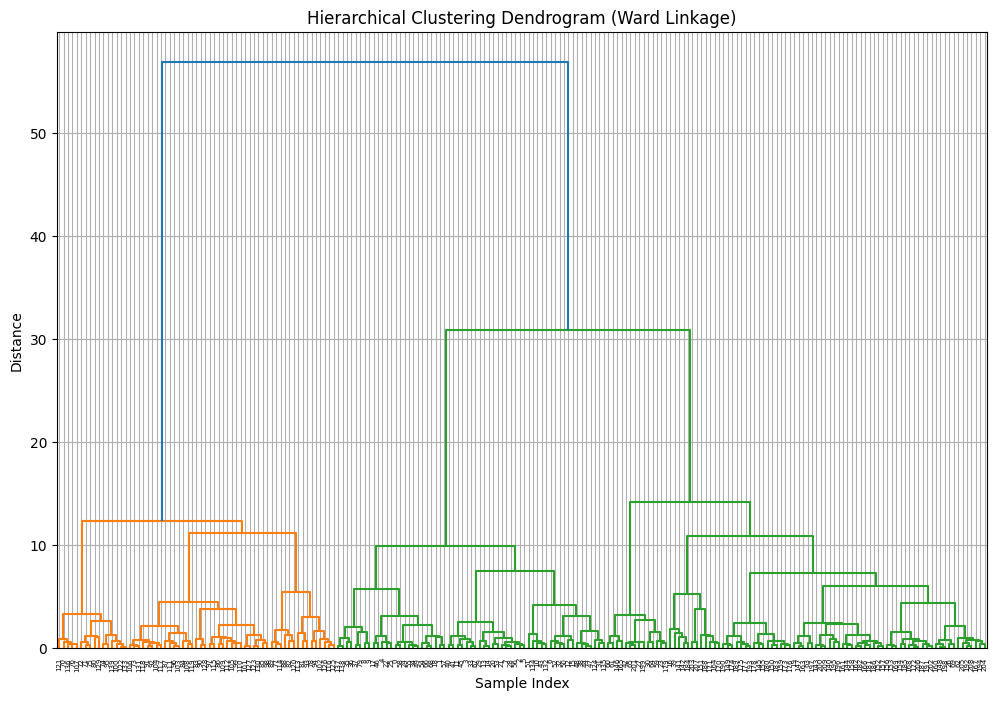

In [5]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute linkage matrix using Ward's method and Euclidean distance
Z = linkage(data, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


C) Clustering Evaluation using Adjusted Rand Index

In this part, the performance of hierarchical clustering is evaluated using the Adjusted Rand Index (ARI).
The ARI compares the clustering result with the ground truth labels (y) to measure how well the unsupervised clusters match the actual classes.

A higher ARI (closer to 1) indicates better agreement with the true labels.

In [6]:
from sklearn.metrics import adjusted_rand_score

# Extract true labels from the dataset
y = df['Class'].values

# Compute Adjusted Rand Index
ari = adjusted_rand_score(y, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")


Adjusted Rand Index (ARI): 0.7132
